<a href="https://colab.research.google.com/github/karlacdl210998/Curso-Python-2023/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
warnings.simplefilter('ignore')

In [39]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1

In [67]:
import statsmodels.api as stats
from statsmodels.tsa.forecasting.theta import ThetaModel

In [68]:

# Lee el archivo CSV
data = pd.read_csv('/content/nueva_data_oficina_acumulador.csv')

# Asegúrate de que la columna 'Mes de venta' sea de tipo datetime
data['Mes de  venta'] = pd.to_datetime(data['Mes de  venta'])

data

,Oficina de ventas,Producto,Marca,Segmento,ID Material,Acumulador,Material,Mes de venta,Mes lista vigente,Concatenado,Precio Venta,Cost.int.,Cost.int.4,Valor neto,Valor neto5,Vol.entr.,Vol.entr.6
0,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2015-01-01,3/1/2014,G-22F41699,853.08,"134,865.50",MXN,"169,367.11",MXN,385.0,M3
1,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2015-02-01,2/1/2015,G-22F42036,884.30,"88,946.89",MXN,"118,211.11",MXN,251.0,M3
2,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2015-03-01,2/1/2015,G-22F42036,884.30,"99,713.20",MXN,"133,345.84",MXN,280.0,M3
3,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2015-04-01,2/1/2015,G-22F42036,884.30,"126,370.39",MXN,"160,967.49",MXN,338.0,M3
4,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2015-05-01,2/1/2015,G-22F42036,884.30,"133,074.34",MXN,"171,920.88",MXN,361.0,M3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2023-05-01,2/1/2023,G-22F44958,1882.33,"73,736.25",MXN,"100,544.97",MXN,105.0,M3
101,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2023-06-01,2/1/2023,G-22F44958,1882.33,"94,101.50",MXN,"132,461.75",MXN,134.0,M3
102,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2023-07-01,2/1/2023,G-22F44958,1882.33,"105,337.50",MXN,"147,927.13",MXN,150.0,M3
103,1200 Gonhermex SA de CV,011 ACUMULADOR,001 GONHER,0001 AUTOMOTRIZ,1002662,G-22F,ACUMULADOR G-22F-450 FT GONHER,2023-08-01,2/1/2023,G-22F44958,1882.33,"112,360.00",MXN,"158,221.37",MXN,160.0,M3


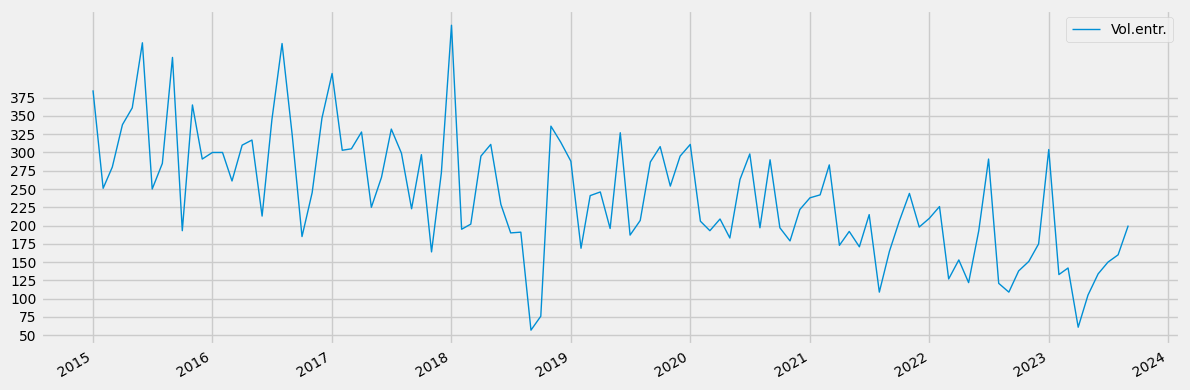

In [69]:
# set column for visualisation & forecasting
Venta = 'Vol.entr.'

# data visualisation for a specific column with date
fig, ax = plt.subplots(figsize=(12, 4))
data['Mes de  venta'] = pd.to_datetime(data['Mes de  venta'])  # Asegúrate de que la columna de fecha sea de tipo datetime
ax.plot(data['Mes de  venta'], data[Venta], label='Vol.entr.')
ax.legend()
fig.autofmt_xdate()

# Ajusta los límites y los ticks del eje y
new_y_ticks = np.arange(50, 400, 25)  # Cambia los límites y el paso según lo necesitas
ax.set_yticks(new_y_ticks)

plt.tight_layout()


In [74]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error